In [1]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_formats = ['retina']
sns.set_style("white")

In [2]:
# Read in clean USAID data pickle
usaid = pd.read_pickle('./clean_usaid.pkl')

In [3]:
usaid.head()

,country_name,region_name,income_group_name,implementing_agency_name,assistance_category_name,fiscal_year,constant_amount,USG_sector_name
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2011,10914528417,Stabilization Operations and Security Sector R...
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2012,9966142830,Stabilization Operations and Security Sector R...
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2013,7345968099,Stabilization Operations and Security Sector R...
7,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2010,7245724425,Stabilization Operations and Security Sector R...
9,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2015,6207678503,Stabilization Operations and Security Sector R...


In [4]:
usaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 986232
Data columns (total 8 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
USG_sector_name             359342 non-null object
dtypes: int64(2), object(6)
memory usage: 24.7+ MB


In [5]:
# Read in HDI data pickle
hdi = pd.read_pickle('./hdi_data.pkl')

In [6]:
hdi.head()

,Country,Year,HDI_Change
0,Afghanistan,1990,NaN
1,Albania,1990,NaN
2,Algeria,1990,NaN
3,Andorra,1990,NaN
4,Angola,1990,NaN


In [7]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5292 entries, 0 to 5318
Data columns (total 3 columns):
Country       5292 non-null object
Year          5292 non-null int64
HDI_Change    4565 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.4+ KB


In [8]:
# Merge dataframes
df = pd.merge(usaid, hdi,  
              how='left', 
              left_on=['country_name','fiscal_year'], 
              right_on = ['Country','Year'])

In [9]:
df.head()

,country_name,region_name,income_group_name,implementing_agency_name,assistance_category_name,fiscal_year,constant_amount,USG_sector_name,Country,Year,HDI_Change
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2011,10914528417,Stabilization Operations and Security Sector R...,Afghanistan,2011.0,0.008
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2012,9966142830,Stabilization Operations and Security Sector R...,Afghanistan,2012.0,0.011
2,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2013,7345968099,Stabilization Operations and Security Sector R...,Afghanistan,2013.0,0.005
3,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2010,7245724425,Stabilization Operations and Security Sector R...,Afghanistan,2010.0,0.010
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Military,2015,6207678503,Stabilization Operations and Security Sector R...,Afghanistan,2015.0,0.002


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 11 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
USG_sector_name             359342 non-null object
Country                     355238 non-null object
Year                        355238 non-null float64
HDI_Change                  345050 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 32.9+ MB


In [11]:
# Drop redundant columns
df.drop(columns = {'Country', 'Year'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 9 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
USG_sector_name             359342 non-null object
HDI_Change                  345050 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 27.4+ MB


In [13]:
# Countries in the UN HDI dataset that the US has not given aid to
set(hdi.Country) - (set(usaid.country_name) & set(hdi.Country)) 

{'Andorra', 'Liechtenstein', 'United States'}

In [14]:
# Countries the US has given to that are not included in the UN HDI dataset
set(usaid.country_name) - (set(usaid.country_name) & set(hdi.Country))

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'China, Republic of (Taiwan)',
 'Curacao',
 'Korea, Democratic Republic',
 'Kosovo',
 'Macau',
 'Nauru',
 'New Caledonia',
 'Somalia',
 'Turks and Caicos Islands',
 'Tuvalu'}

In [15]:
# Drop Null Values for 'HDI_Change'
df = df[pd.notnull(df['HDI_Change'])]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345050 entries, 0 to 359341
Data columns (total 9 columns):
country_name                345050 non-null object
region_name                 345050 non-null object
income_group_name           345050 non-null object
implementing_agency_name    345050 non-null object
assistance_category_name    345050 non-null object
fiscal_year                 345050 non-null int64
constant_amount             345050 non-null int64
USG_sector_name             345050 non-null object
HDI_Change                  345050 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 26.3+ MB


In [17]:
### Need to aggregate all individual expenses, sum total aid
### Break down by country/region/income/year/HDI(same for all 
### categories for country in given year), then break down by 
### Miltary/Economic aid, implementing agency, and Sector

df = df.groupby(['country_name', 
                 'region_name', 
                 'income_group_name', 
                 'fiscal_year', 
                 'HDI_Change',  
                 'assistance_category_name', 
                 'implementing_agency_name', 
                 'USG_sector_name']
               ).agg({'constant_amount': 'sum'})

df = df.reset_index()
df.head()

,country_name,region_name,income_group_name,fiscal_year,HDI_Change,assistance_category_name,implementing_agency_name,USG_sector_name,constant_amount
0,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Agriculture,7053065
1,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Natural Resources and Biodiversity,34632
2,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Agriculture,Nutrition,4392782
3,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Health and Human Services,Pandemic Influenza and Other Emerging Threats ...,3976353
4,Afghanistan,South and Central Asia,Low Income Country,2003,0.01,Economic,Department of Health and Human Services,Stabilization Operations and Security Sector R...,915696


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58567 entries, 0 to 58566
Data columns (total 9 columns):
country_name                58567 non-null object
region_name                 58567 non-null object
income_group_name           58567 non-null object
fiscal_year                 58567 non-null int64
HDI_Change                  58567 non-null float64
assistance_category_name    58567 non-null object
implementing_agency_name    58567 non-null object
USG_sector_name             58567 non-null object
constant_amount             58567 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.0+ MB


In [19]:
# Pickle combined df
df.to_pickle('./all_data.pkl')

In [20]:
# Write CSV of combined df
df.to_csv('./all_data.csv')

# Some initial EDA

In [47]:
# Take a look at which countries the US has given the most aid to from 1990-2017
# Dollar amounts are in 2016 USD
top_20 = df.groupby('country_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount'].head(20)
top_20 = top_20.reset_index()

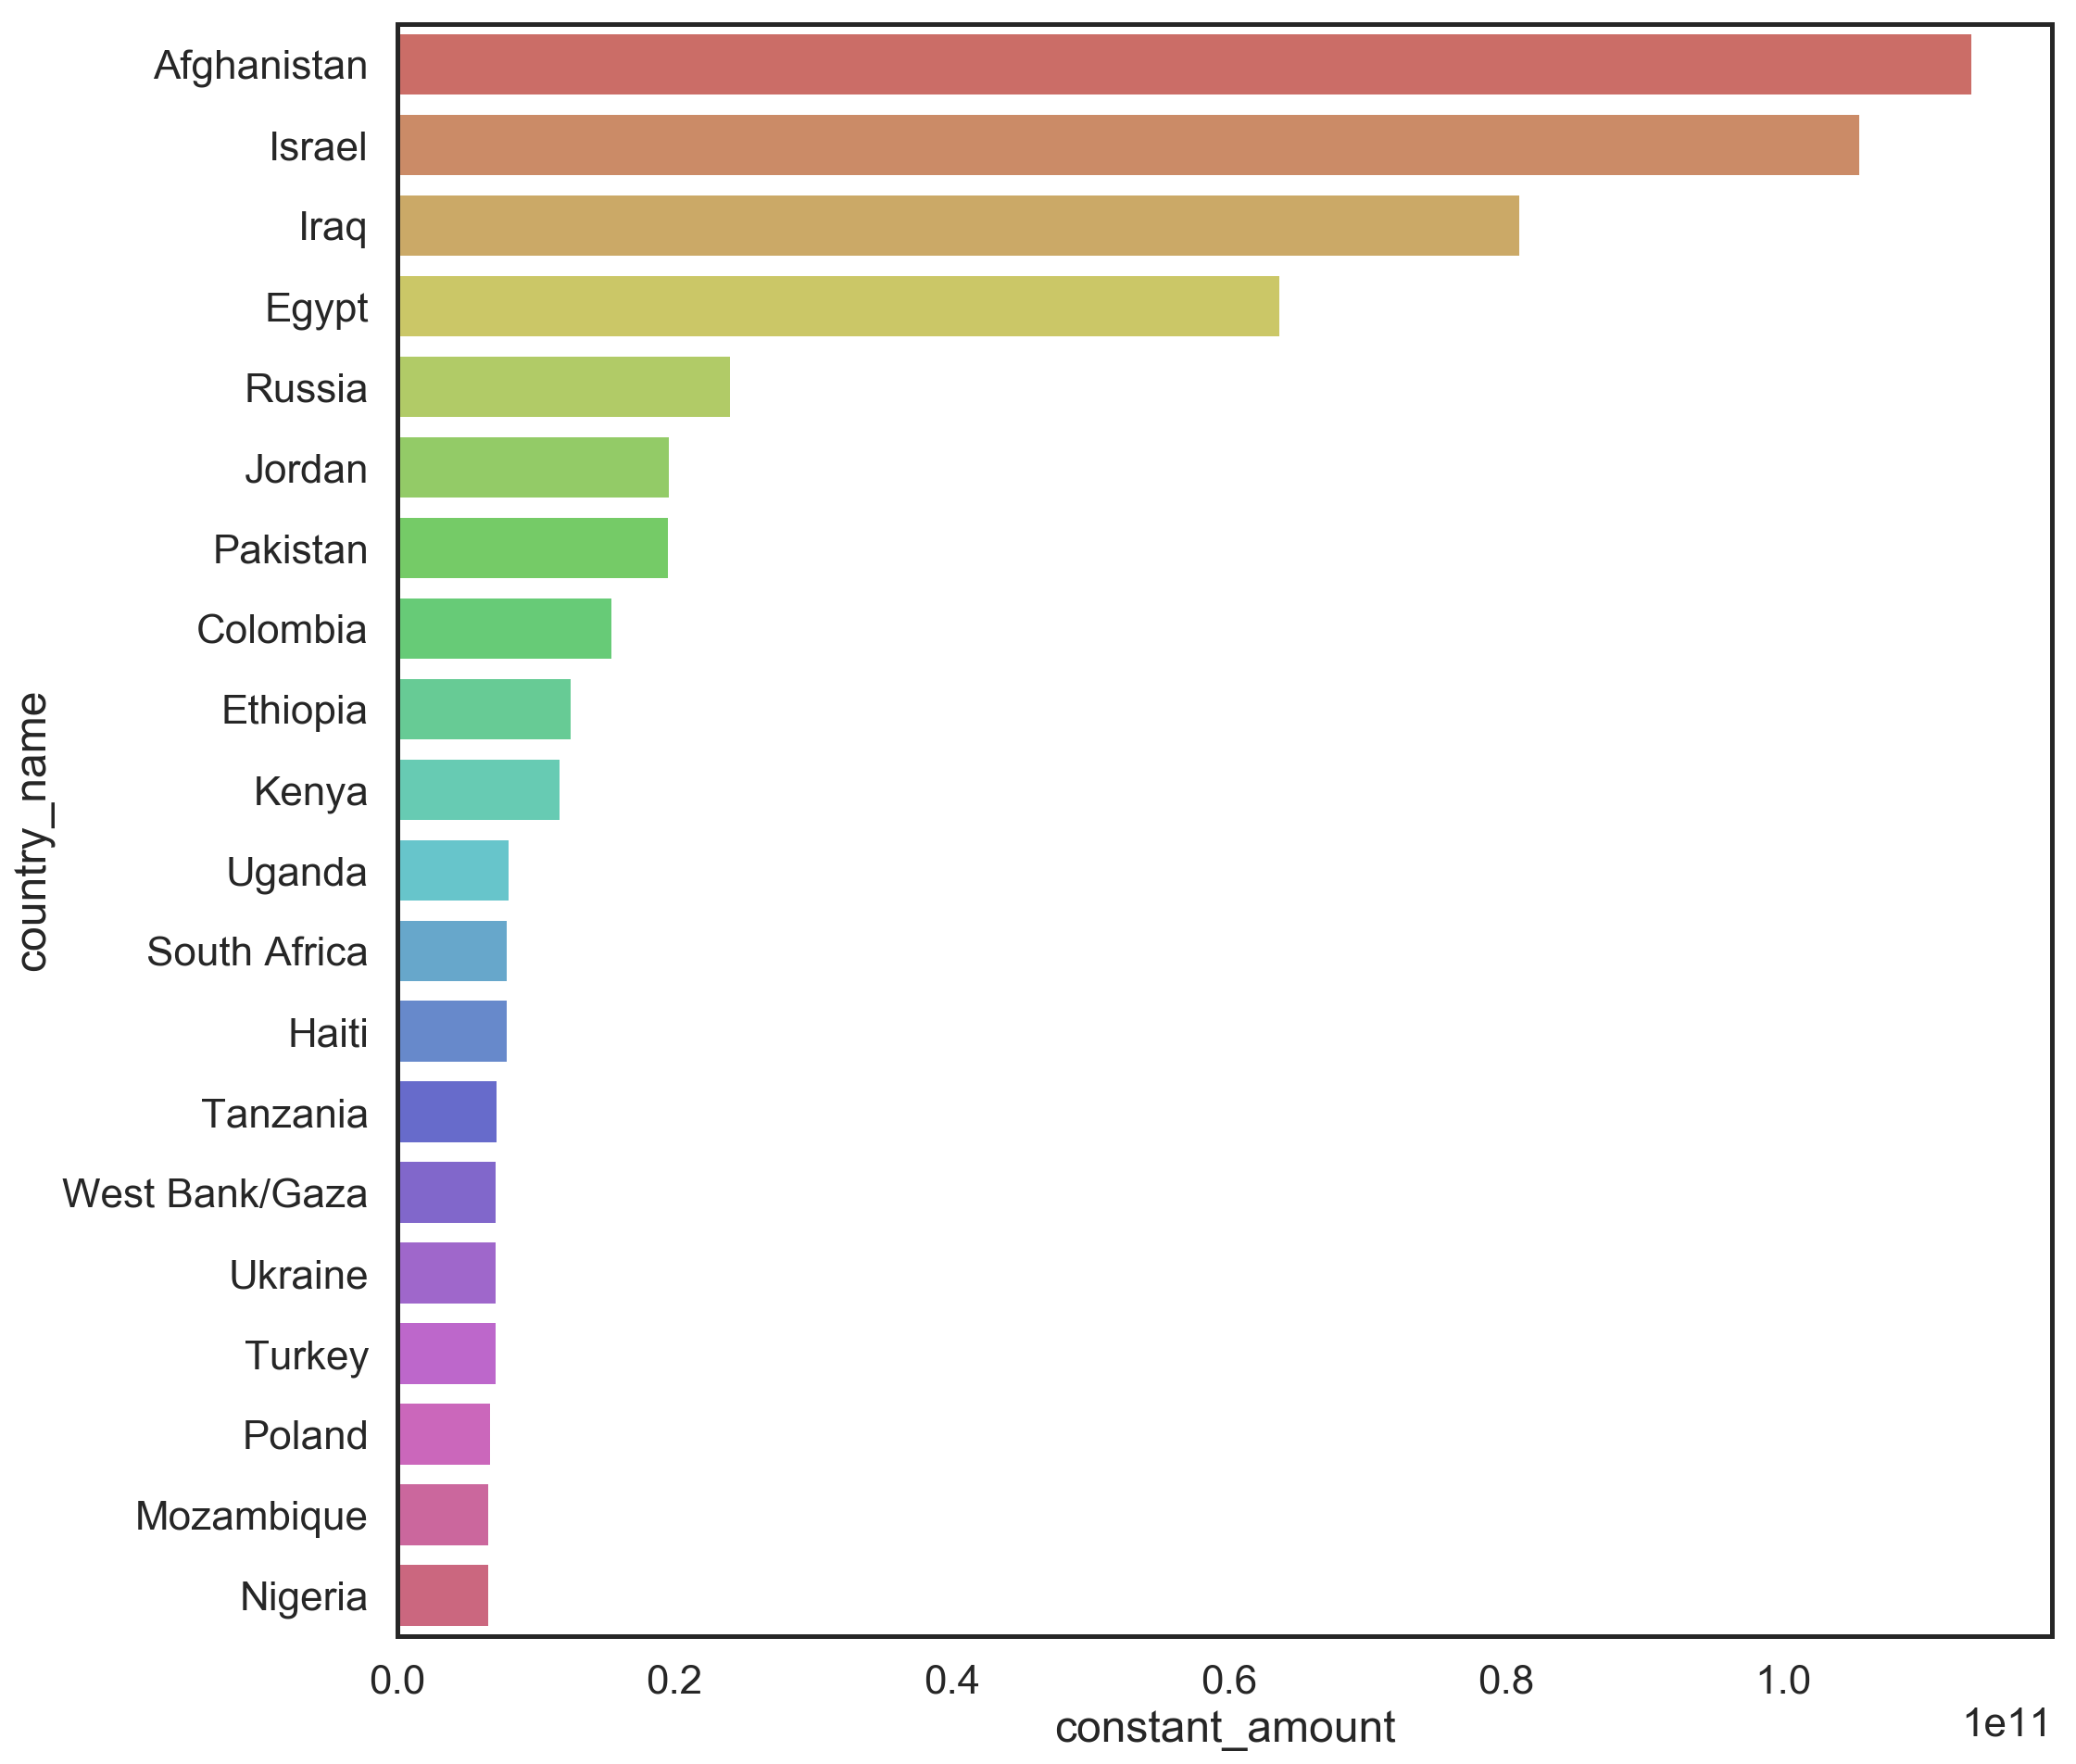

In [61]:
plt.figure(figsize=(16, 16))
sns.set_context("poster")
sns.barplot(x='constant_amount', y='country_name', data=top_20, palette="hls")
plt.savefig('top_20_countries.png', bbox_inches = 'tight');

In [22]:
# Plot USAID spending for top 20 countries over time

In [23]:
# Which income-level countries has the US given the most aid to?
df.groupby('income_group_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount']

income_group_name
Lower Middle Income Country    204628366786
Upper Middle Income Country    204242652419
Low Income Country             203132964084
High Income Country            123339226127
Name: constant_amount, dtype: int64

In [24]:
# What type of aid has the US given to High Income Countries?
# df.loc[df.income_group_name == 'High Income Country']['USG_sector_name'].unique()

### Result: all kinds

In [36]:
df.USG_sector_name.nunique()

52

In [25]:
# See how much money has been given to various sector programs/purposes
df.groupby('USG_sector_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount']

USG_sector_name
Stabilization Operations and Security Sector Reform      286141993002
Macroeconomic Foundation for Growth                       79220921997
Protection, Assistance and Solutions                      71408999491
HIV/AIDS                                                  40365634293
Rule of Law and Human Rights                              29953949996
Infrastructure                                            27322817469
Good Governance                                           20424632542
Counter-Narcotics                                         18789109451
Agriculture                                               14577101184
Direct Administrative Costs                               14376888607
Combating Weapons of Mass Destruction (WMD)                9885321046
Basic Education                                            8484174416
Private Sector Competitiveness                             7744042513
Social Services                                            7612461308
Wate

In [26]:
# Where assistance_category_name = 'Military', what are the kinds of programs?
df.loc[df['assistance_category_name'] == 'Military']['USG_sector_name'].unique()

array(['Counter-Narcotics',
       'Stabilization Operations and Security Sector Reform',
       'Combating Weapons of Mass Destruction (WMD)', 'Counter-Terrorism',
       'Peace and Security - General', 'Multi-sector - Unspecified',
       'Conflict Mitigation and Reconciliation', 'Infrastructure',
       'Trade and Investment', 'Health - General',
       'Rule of Law and Human Rights', 'Water Supply and Sanitation',
       'Good Governance'], dtype=object)

In [27]:
# What are the implementing agencies where assistance category = 'Military'?
df.loc[df['assistance_category_name'] == 'Military']['implementing_agency_name'].unique()

array(['Department of Defense', 'Department of the Army',
       'Department of State', 'Department of the Navy',
       'Department of the Air Force', 'Department of Homeland Security'],
      dtype=object)

In [28]:
# Where assistance_category_name = 'Economic', what are the kinds of programs?
# df.loc[df['assistance_category_name'] == 'Economic']['USG_sector_name'].unique()
### Quite a bit of overlap (Economic assistance covers more issues)

In [29]:
# What are the implementing agencies where assistance category = 'Economic'?
df.loc[df['assistance_category_name'] == 'Economic']['implementing_agency_name'].unique()

array(['Department of Agriculture',
       'Department of Health and Human Services', 'Department of Labor',
       'Department of State', 'Department of the Treasury',
       'Trade and Development Agency',
       'U.S. Agency for International Development',
       'Department of the Army', 'Department of Defense',
       'Department of Transportation', 'Department of Homeland Security',
       'Department of Justice', 'Department of Energy',
       'Department of Commerce', 'Peace Corps',
       'Millennium Challenge Corporation', 'Department of the Interior',
       'African Development Foundation', 'Inter-American Foundation',
       'Environmental Protection Agency', 'National Science Foundation',
       'Open World Leadership Center', 'Federal Trade Commission',
       'United States Institute of Peace',
       'Overseas Private Investment Corporation'], dtype=object)

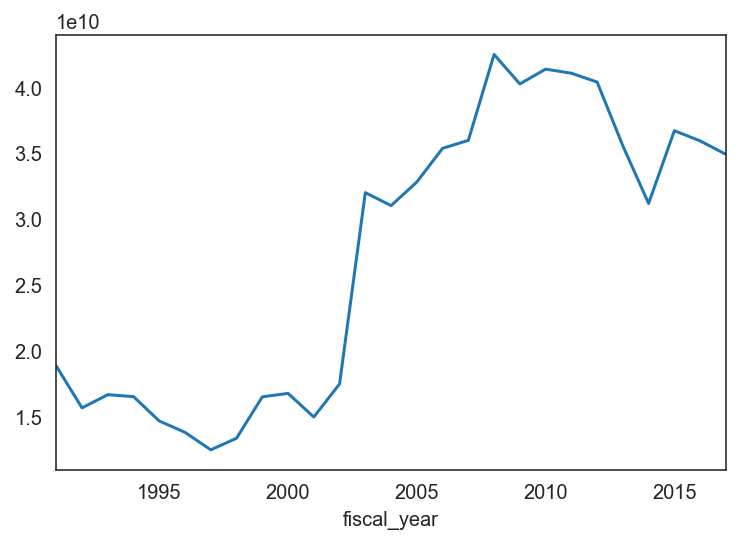

In [30]:
# How much has the goverment given to aid each year?
total_aid_by_year = df.groupby('fiscal_year').sum().sort_values('fiscal_year', ascending = False)['constant_amount']
total_aid_by_year.plot()

# Looks like aid increased significantly after 9/11 and the Iraq War

In [31]:
total_aid_by_year

fiscal_year
2017    34924953720
2016    35942127634
2015    36716358968
2014    31197433715
2013    35565150383
2012    40405147700
2011    41073345423
2010    41383128774
2009    40261017563
2008    42493010981
2007    35983314683
2006    35376610445
2005    32823204483
2004    31036039573
2003    32020280627
2002    17515478283
2001    15008100005
2000    16796749411
1999    16537289536
1998    13399074875
1997    12518446732
1996    13843364304
1995    14705025205
1994    16550978788
1993    16699876420
1992    15698755470
1991    18868945715
Name: constant_amount, dtype: int64

In [32]:
# Plot economic aid by year (wonder if it's different)

#economic_aid_by_year = 
economic_aid = df.loc[df['assistance_category_name'] == 'Economic']

economic_aid_by_year = economic_aid.groupby('fiscal_year').sum().sort_values(
    'fiscal_year', ascending = False)['constant_amount']


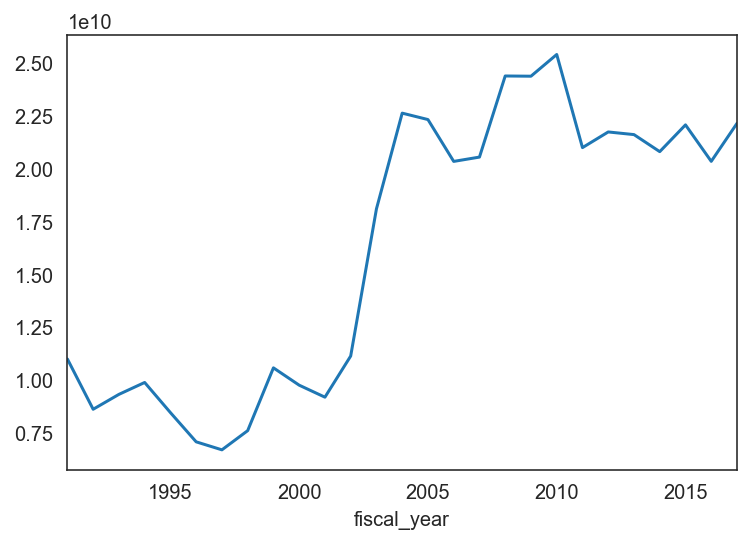

In [33]:
economic_aid_by_year.plot()

In [34]:
# Things to do:

# - Map USAID spending for top, like, 20 countries over time
# - Bar graph by year for military vs economic expenditures
# - Line plot for total economic vs military spending over time
# - Line plot comparing US GDP to aid spending?



# For main models, 
# maybe have row for each country, and aggregate sum spent in each 
# 'dac_purpose_name' entry
# or 


###### input should be percent of GDP spent on aid in a given year?

# Figure out if there's a correlation like, every dollar spent results in such and such change

#### what if result was HDI score CHANGE for that year (from year before), inputs are country 
## (countries should be dummy-coded), amount of money spent that year on 'dac_purpose_name'
##  -->> use this to figure out which variables/programs have the biggest effect!!!


In [35]:
# First, do we want to see if there's correlation between aid received and HDI? 
# like graph money given vs HDI 